O sistema é controlável em malha aberta.
O sistema é observável em malha aberta.
O sistema é controlável em malha fechada.
O sistema é observável em malha fechada.


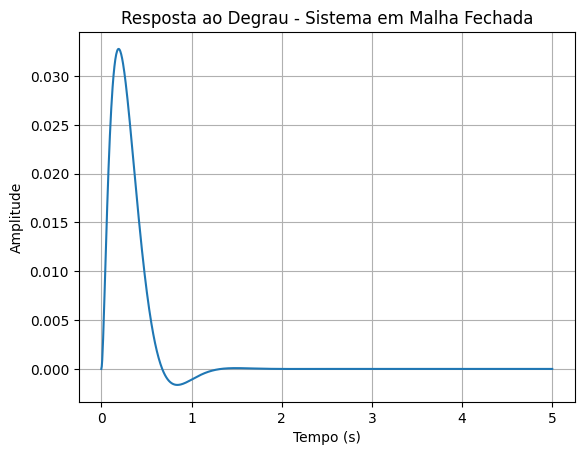

In [2]:
import numpy as np
import control
import matplotlib.pyplot as plt

# Função de transferência original
num = [22, 0]
den = [1, 5, 26, 33]
G = control.tf(num, den)

# Convertendo para representação em espaço de estados
sys_ss = control.tf2ss(G)
A = sys_ss.A
B = sys_ss.B
C = sys_ss.C
D = sys_ss.D
# Especificações de desempenho
ts = 1.0  # Tempo de acomodação (segundos)
Mp = 0.05  # Sobressinal máximo (5%)

# Calculando os polos desejados
zeta = -np.log(Mp) / np.sqrt(np.pi**2 + np.log(Mp)**2)
wn = 4.6 / (zeta * ts)
p1 = -zeta * wn + 1j * wn * np.sqrt(1 - zeta**2)
p2 = -zeta * wn - 1j * wn * np.sqrt(1 - zeta**2)
p3 = -10 * zeta * wn

# Calculando o ganho K usando a fórmula de Ackermann
des_poles = np.array([p1, p2, p3])
K = control.acker(A, B, des_poles)

# Verificando a controlabilidade em malha aberta
Qc = control.ctrb(A, B)
if np.linalg.matrix_rank(Qc) == A.shape[0]:
    print("O sistema é controlável em malha aberta.")
else:
    print("O sistema não é controlável em malha aberta.")

# Verificando a observabilidade em malha aberta
Qo = control.obsv(A, C)
if np.linalg.matrix_rank(Qo) == A.shape[0]:
    print("O sistema é observável em malha aberta.")
else:
    print("O sistema não é observável em malha aberta.")

# Calculando a matriz de ganho L para erro de regime nulo
L = control.place(A.T, C.T, des_poles).T

# Sistema em malha fechada
A_cl = A - B @ K
B_cl = B
C_cl = C
D_cl = D

# Verificando a controlabilidade em malha fechada
Qc_cl = control.ctrb(A_cl, B_cl)
if np.linalg.matrix_rank(Qc_cl) == A_cl.shape[0]:
    print("O sistema é controlável em malha fechada.")
else:
    print("O sistema não é controlável em malha fechada.")

# Verificando a observabilidade em malha fechada
Qo_cl = control.obsv(A_cl, C_cl)
if np.linalg.matrix_rank(Qo_cl) == A_cl.shape[0]:
    print("O sistema é observável em malha fechada.")
else:
    print("O sistema não é observável em malha fechada.")

# Simulando a resposta ao degrau do sistema em malha fechada
sys_cl = control.ss(A_cl, B_cl, C_cl, D_cl)
t = np.linspace(0, 5, 1000)
_, y = control.step_response(sys_cl, T=t)

# Plotando a resposta ao degrau
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau - Sistema em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()